# **Introduction**

This guide follows the same format as [quickstart](00-quickstart.ipynb) but explores further functionality provided by twinLab. In this jupyter notebook we will:

1. Upload a dataset to twinLab.
2. List, view and summarise uploaded datasets.
3. Use `Emulator.train` to create a surrogate model.
4. List, view and summarise trained emulators.
5. Use the model to make a prediction with `Emulator.predict`.
6. Visualise the results and their uncertainty.
7. Verify the model using `Emulator.sample`.


In [1]:
# Standard imports
from pprint import pprint

# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Project imports
import twinlab as tl


          ====== TwinLab Client Initialisation ======
          Version     : 2.0.0
          Server      : https://twinlab.digilab.co.uk
          Environment : /Users/mead/digiLab/twinLab-Demos/.env



### **Your twinLab information**

Confirm your twinLab version


In [2]:
tl.versions()

{'cloud': '2.0.0',
 'modal': '0.2.0',
 'library': '1.3.0',
 'image': 'twinlab-prod'}

And view your user information, including how many credits you have.


In [3]:
tl.user_information()

{'username': 'alexander', 'credits': 1000}

### **Upload a dataset**

Datasets must be data presented as a `pandas.DataFrame` object, or a filepaths which points to a csv file that can be parsed to a `pandas.DataFrame` object. **Both must be formatted with clearly labelled columns.** Here, we will label the input (predictor) variable `x` and the output variable `y`. In `twinlab`, data is expected to be in column-feature format, meaning each row represents a single data sample, and each column represents a data feature.

`twinLab` contains a `Dataset` class with attirbutes and methods to process, view and summarise the dataset. Datasets must be created with a `dataset_id` which is used to access them. The dataset can be uploaded using the `upload` method.


In [4]:
x = [
    0.6964691855978616,
    0.28613933495037946,
    0.2268514535642031,
    0.5513147690828912,
    0.7194689697855631,
    0.42310646012446096,
    0.9807641983846155,
    0.6848297385848633,
    0.48093190148436094,
    0.3921175181941505,
]

y = [
    -0.8173739564129022,
    0.8876561174050408,
    0.921552660721474,
    -0.3263338765412979,
    -0.8325176123242133,
    0.4006686354731812,
    -0.16496626502368078,
    -0.9607643657025954,
    0.3401149876855609,
    0.8457949914442409,
]

# Creating the dataframe using the above arrays
df = pd.DataFrame({"x": x, "y": y})

# View the dataset before uploading
display(df)

# Define the name of the dataset
dataset_id = "example_data"

# Intialise a Dataset object
dataset = tl.Dataset(id=dataset_id)

# Upload the dataset
dataset.upload(df, verbose=True)

,x,y
0,0.696469,-0.817374
1,0.286139,0.887656
2,0.226851,0.921553
3,0.551315,-0.326334
4,0.719469,-0.832518
5,0.423106,0.400669
6,0.980764,-0.164966
7,0.684830,-0.960764
8,0.480932,0.340115
9,0.392118,0.845795


Dataframe is uploading.
Processing dataset
Dataset example_data was processed.


### **View datasets**

Once a dataset has been uploaded it can be easily accessed using built in twinLab functions. A list of all uploaded datasets can be produced, individual datasets can be viewed and summarised. This summary contains some basic statistics of the data.


In [5]:
# List all datasets on cloud
tl.list_datasets()

['2DActive_Data',
 'Excel-test',
 'Falmouth-Mikey',
 'New_Points',
 'biscuits',
 'eval_data',
 'example_data',
 'functional-data',
 'functional-test-data',
 'fusion',
 'sampled-data',
 'twinLab-logo']

In [6]:
# View the dataset
dataset.view()

,x,y
0,0.696469,-0.817374
1,0.286139,0.887656
2,0.226851,0.921553
3,0.551315,-0.326334
4,0.719469,-0.832518
5,0.423106,0.400669
6,0.980764,-0.164966
7,0.684830,-0.960764
8,0.480932,0.340115
9,0.392118,0.845795


In [7]:
# Get a statistical summary of the dataset
dataset.summarise()

,x,y
count,10.000000,10.000000
mean,0.544199,0.029383
std,0.229352,0.748191
min,0.226851,-0.960764
25%,0.399865,-0.694614
50%,0.516123,0.087574
75%,0.693559,0.734513
max,0.980764,0.921553


### **Train an emulator**

The `Emulator` class is used to train and implement your surrogate models. As with datasets, an id is defined, this is what the model will be saved as in the cloud. When training a model the arguments are passed using a `TrainParams` object; `TrainParams` is a class that contains all the necessary parameters needed to train your model. To train the model we use the `Emulator.train` function, inputting the `TrainParams` object as an argument to this function.


In [8]:
# Initialise emulator
emulator_id = "example_emulator"

emulator = tl.Emulator(id=emulator_id)

# Define the training parameters for your emulator
params = tl.TrainParams(train_test_ratio=1.0)

# Train the mulator using the train method
emulator.train(dataset=dataset, inputs=["x"], outputs=["y"], params=params, verbose=True)

Model example_emulator has begun training.
Training complete!



### **View emulators**

Just as with datasets all saved emulators can be listed, viewed and summarised.


In [9]:
# List emulators
tl.list_emulators()

['2DActiveGP',
 'Example_emulator',
 'Excel-emulator',
 'Excel-model',
 'Hello',
 'backward-model',
 'biscuits',
 'campaign',
 'decoder',
 'example_emulator',
 'fusion',
 'gardening',
 'my_emulator',
 'new-campaign',
 'twinLab-logo',
 'universe']

In [10]:
# View an emulator's parameters
emulator.view()

{'model_id': 'example_emulator',
 'fidelity': None,
 'estimator': 'gaussian_process_regression',
 'estimator_kwargs': {'detrend': False,
  'device': 'cpu',
  'covar_module': None,
  'estimator_type': None},
 'decompose_input': False,
 'input_explained_variance': 0.99,
 'decompose_output': False,
 'output_explained_variance': 0.99,
 'train_test_ratio': 1.0,
 'model_selection': False,
 'model_selection_kwargs': {'seed': None,
  'evaluation_metric': 'MSLL',
  'val_ratio': 0.2,
  'base_kernels': 'restricted',
  'depth': 1,
  'beam': None,
  'resource_per_trial': {'cpu': 1, 'gpu': 0}},
 'seed': None,
 'inputs': ['x'],
 'outputs': ['y'],
 'dataset_id': 'example_data',
 'modal_handle': 'fc-gUNH9EJ5mnupnDdaYD5IrU'}

In [11]:
# View the status of a campaign
pprint(emulator.summarise())

{'model_summary': {'data_diagnostics': {'inputs': {'x': {'25%': 0.39986475367672814,
                                                         '50%': 0.5161233352836261,
                                                         '75%': 0.693559323844612,
                                                         'count': 10.0,
                                                         'max': 0.9807641983846156,
                                                         'mean': 0.544199352975335,
                                                         'min': 0.2268514535642031,
                                                         'std': 0.22935216613691597}},
                                        'outputs': {'y': {'25%': -0.6946139364450011,
                                                          '50%': 0.0875743613309401,
                                                          '75%': 0.7345134024514759,
                                                          'count': 10.0,
        

### **Prediction using the trained emulators**

The surrogate model is now trained and saved to the cloud under the `emulator_id`. It can now be used to make predictions. First define a dataset of inputs for which you want to find outputs; ensure that this is a `pandas.DataFrame` object. Then call `Emulator.predict` with the keyword arguments being the evaluation dataset.


In [12]:
# Define the inputs for the dataset
x_eval = np.linspace(0, 1, 128)

# Convert to a dataframe
df_eval = pd.DataFrame({"x": x_eval})
display(df_eval)

# Predict the results
predictions = emulator.predict(df_eval)
result_df = pd.concat([predictions[0], predictions[1]], axis=1)
df_mean, df_stdev = result_df.iloc[:,0], result_df.iloc[:,1]
df_mean, df_stdev = df_mean.values, df_stdev.values
print(result_df.head())

,x
0,0.000000
1,0.007874
2,0.015748
3,0.023622
4,0.031496
...,...
123,0.968504
124,0.976378
125,0.984252
126,0.992126


          y         y
0  0.617689  0.656265
1  0.629105  0.640576
2  0.640630  0.624421
3  0.652252  0.607809
4  0.663957  0.590755


### **Viewing the results**

`Emulator.predict` outputs mean values for each input and their standard deviation; this gives the abilty to nicely visualise the uncertainty in results.


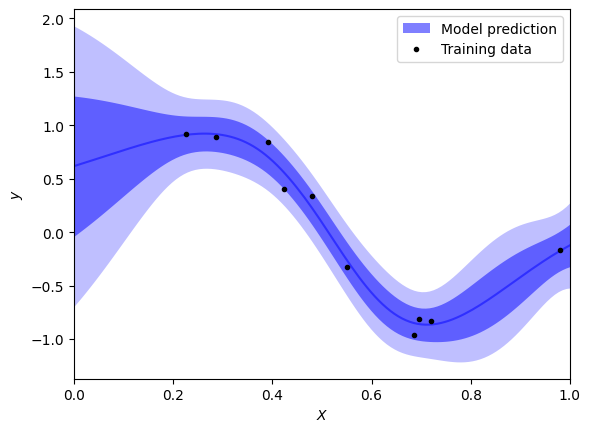

In [13]:
# Plot parameters
nsigs = [1, 2]
color = "blue"
alpha = 0.5
plot_training_data = True
plot_model_mean = True
plot_model_bands = True

# Plot results
grid = df_eval["x"]
mean = df_mean
err = df_stdev
if plot_model_bands:
    label = r"Model prediction"
    plt.fill_between(grid, np.nan, np.nan, lw=0, color=color, alpha=alpha, label=label)
    for isig, nsig in enumerate(nsigs):
        plt.fill_between(
            grid,
            mean - nsig * err,
            mean + nsig * err,
            lw=0,
            color=color,
            alpha=alpha / (isig + 1),
        )
if plot_model_mean:
    label = r"Model prediction" if not plot_model_bands else None
    plt.plot(grid, mean, color=color, alpha=alpha, label=label)
if plot_training_data:
    plt.plot(df["x"], df["y"], ".", color="black", label="Training data")
plt.xlim((0.0, 1.0))
plt.xlabel(r"$X$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

### **Sampling from an emulator**

The `Emulator.sample` function can be used to retrieve a number of results from your model. It requires the inputs for which you want the values and how many outputs to calculate for each.


In [14]:
# Define the sample inputs
sample_inputs = pd.DataFrame({"x": np.linspace(0, 1, 128)})

# Define number of samples to calculate for each input
num_samples = 100

# Calculate the samples using twinLab
sample_result = emulator.sample(sample_inputs, num_samples)

# View the results in the form of a dataframe
display(sample_result)

y                                                              \
            0         1         2         3         4         5         6   
0    0.756390  1.853993  0.823417  1.371268  0.431233 -0.709656  0.229130   
1    0.755027  1.847134  0.799176  1.359203  0.457394 -0.691794  0.235557   
2    0.755059  1.837743  0.776577  1.345975  0.485609 -0.670339  0.244909   
3    0.754962  1.824988  0.755707  1.330986  0.516783 -0.644560  0.256808   
4    0.753449  1.808439  0.737642  1.314877  0.550443 -0.613255  0.270532   
..        ...       ...       ...       ...       ...       ...       ...   
123 -0.083540 -0.069950 -0.047424 -0.339741 -0.086472 -0.102535 -0.116463   
124 -0.057099 -0.047825 -0.040704 -0.298989 -0.077790 -0.076339 -0.114182   
125 -0.033743 -0.022989 -0.038330 -0.256611 -0.067926 -0.050679 -0.114805   
126 -0.013021  0.004447 -0.039621 -0.212369 -0.056606 -0.025019 -0.116908   
127  0.003754  0.033889 -0.042588 -0.166760 -0.043807  0.000440 -0.120540   

                                   ...                                \
            7         8         9  ...        90        91        92   
0    1.681228  0.712160  1.247642  ...  0.398930  1.348119 -0.500422   
1    1.641124  0.719511  1.216915  ...  0.410275  1.332218 -0.505996   
2    1.600612  0.726263  1.182989  ...  0.425708  1.314064 -0.507662   
3    1.561297  0.733558  1.147110  ...  0.443142  1.291679 -0.505295   
4    1.524240  0.740913  1.111087  ...  0.461517  1.265116 -0.498079   
..        ...       ...       ...  ...       ...       ...       ...   
123 -0.259751 -0.300717 -0.021970  ... -0.164327 -0.054913 -0.093152   
124 -0.230520 -0.253737 -0.018292  ... -0.123519 -0.029760 -0.088063   
125 -0.202835 -0.203848 -0.016146  ... -0.079732 -0.007058 -0.088033   
126 -0.175734 -0.150492 -0.015144  ... -0.034351  0.011595 -0.091935   
127 -0.148212 -0.095563 -0.014619  ...  0.011614  0.026327 -0.098797   

                                                                           
           93        94        95        96        97        98        99  
0    1.238990  0.587308  0.257820  0.441664  0.868195  0.597804  0.194941  
1    1.238527  0.596972  0.279154  0.438346  0.890201  0.594286  0.255293  
2    1.235884  0.607423  0.301154  0.437977  0.909731  0.593023  0.311917  
3    1.232298  0.618711  0.325640  0.440925  0.926899  0.591831  0.366092  
4    1.228072  0.630968  0.352474  0.448865  0.941383  0.590844  0.417451  
..        ...       ...       ...       ...       ...       ...       ...  
123 -0.091318 -0.357808 -0.180089 -0.151408 -0.162223 -0.315345 -0.307405  
124 -0.063075 -0.352810 -0.136723 -0.111794 -0.141963 -0.316655 -0.290154  
125 -0.037003 -0.352653 -0.091892 -0.074840 -0.119713 -0.317279 -0.276892  
126 -0.013277 -0.357360 -0.047488 -0.039215 -0.096824 -0.315658 -0.268949  
127  0.009843 -0.368079 -0.004716 -0.006656 -0.074239 -0.309880 -0.265807  

[128 rows x 100 columns]

### **Viewing the results**

The results can be plotted over the top of the previous graph giving a nice visualisation of the sampled data, with the model's uncertainity.


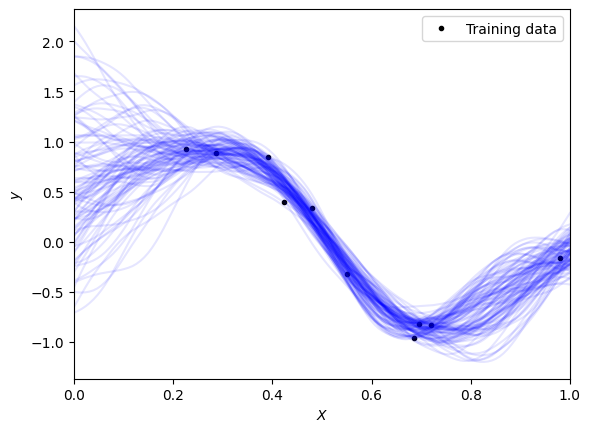

In [15]:
# Plot parameters
color_curve = "blue"
alpha_curve = 0.10
color_data = "black"
plot_training_data = True
plot_model_bands = False

# Plot samples drawn from the model
if plot_training_data:
    plt.plot(df["x"], df["y"], ".", color=color_data, label="Training data")
plt.plot(sample_inputs, sample_result["y"], color=color_curve, alpha=alpha_curve)
plt.xlim((0.0, 1.0))
plt.xlabel(r"$X$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

### **Deleting datasets and emulators**

To keep your cloud storage tidy you should delete your datasets and emulators when you are finished with them. `Emulator.delete` and `Dataset.delete` deletes the emulators and the datasets from the cloud storage respectively.


In [16]:
# Delete dataset
dataset.delete()

# Delete emulator
emulator.delete()